In [ ]:
import pymongo

import time
import datetime



conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.beer
cursor = collection.find_one({"finished": ""}, {'beername': 1, 'beerstyle':1, 'description':1, 'created':1}) 
print(cursor)
if cursor:  
    print('iffff') 
    name = cursor['beername']
    style = cursor['beerstyle']
    desc = cursor['description']
    created = cursor['created'] 
    createdformat = created.strftime("%d/%m/%Y %H:%M:%S")
    today = datetime.datetime.now() 
    
    elapsedTime = str(today-created)
    brewing = elapsedTime.replace(':','h')
    days = brewing[0:13]+'m'

    
    
    



In [ ]:
import pymongo
import datetime  
import time
conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
db = conn.brewpiless
collection = db.beer
res2 = collection.find({"finished": ""}).distinct("beername")
res = list(res2) 
tudo = collection.find_one({"beername": res[0]})
tudodict = dict(tudo)
created = tudodict['created']
createdformat = created.strftime("%d/%m/%Y %H:%M:%S")

today = datetime.datetime.now() 
elapsedTime = str(today-created)
brewing = elapsedTime.replace(':','h')
days = brewing[0:13]+'m'

print()

In [ ]:
import pymongo
import numpy as np
import pandas as pd
conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
db = conn.brewpiless
collection = db.brewpiless    
    
#convert entire collection to Pandas dataframe
df = pd.DataFrame(list(collection.find({}, {'_id':0,'beername': 1, 'created':1, 'beertemp':1, 'fridgetemp':1, 'beerset':1, 'fridgeset':1})))

In [ ]:
dfbrew.head()

In [ ]:
print(plt.style.available)

In [4]:
import pymongo
import numpy as np
import pandas as pd
conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
db = conn.brewpiless
collection = db.brewpiless    
    
#convert entire collection to Pandas dataframe
df = pd.DataFrame(list(collection.find({}, {'_id':0,'beername': 1, 'created':1, 'beertemp':1, 'fridgetemp':1, 'beerset':1, 'fridgeset':1})))
df['created'] = pd.to_datetime(df['created'])
df['beertemp'] = df['beertemp'].astype('float') 
df['fridgetemp'] = df['fridgetemp'].astype('float') 
df['beerset'] = df['beerset'].astype('float') 
df['fridgeset'] = df['fridgeset'].astype('float') 
df = df.sort_values('created', ascending=True) 

In [ ]:

import matplotlib.pyplot as plt
#final_df.index
#final_df.set_index('created')['beertemp'].plot();

x = final_df['created']
y = final_df['beertemp']
plt.plot(x,y, label='beertemp')

x2 = final_df['created']
y2 = final_df['fridgetemp']
plt.plot(x2,y2, label='fridgetemp')
 
 
  

x3 = final_df['created']
y3 = final_df['beerset']
plt.plot(x3,y3, label='Beer Set')
 
x4 = final_df['created']
y4 = final_df['fridgeset']
plt.plot(x4,y4, label='fridgeset')

plt.title("My Last Beer", fontsize=14, fontweight=0, color='blue')
# Add legend
plt.legend(loc=2, ncol=2)
plt.style.use('seaborn-colorblind')
 
plt.show()


 



In [ ]:
for index, row in df.iterrows():
    label = row['created']
    x1 =  row['beertemp']
    x2 = row['fridgetemp']
    x3 = row['beerset']
    x4 = row['fridgeset']   
    print(label,x1,x2,x3,x4)

In [18]:
df = pd.DataFrame(list(collection.find({'beername':'beertest'}, {'_id':0,'beername': 1, 'created':1, 'beertemp':1, 'fridgetemp':1, 'beerset':1, 'fridgeset':1})))
df['created'] = pd.to_datetime(df['created'])
df['beertemp'] = df['beertemp'].astype('float') 
df['fridgetemp'] = df['fridgetemp'].astype('float') 
df['beerset'] = df['beerset'].astype('float') 
df['fridgeset'] = df['fridgeset'].astype('float') 
df = df.sort_values('created', ascending=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   beername    344 non-null    object        
 1   created     344 non-null    datetime64[ns]
 2   beertemp    344 non-null    float64       
 3   fridgetemp  344 non-null    float64       
 4   beerset     344 non-null    float64       
 5   fridgeset   344 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 18.8+ KB


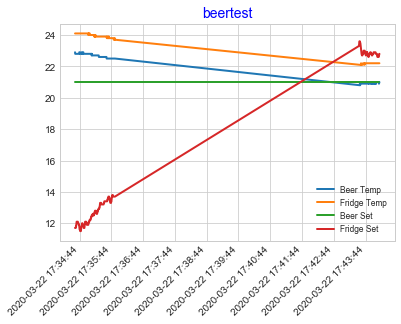

In [1]:
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
def createchart(beername):
    beer = beername
    conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
    db = conn.brewpiless
    collection = db.brewpiless    
    
    df = pd.DataFrame(list(collection.find({'beername':beer}, {'_id':0,'beername': 1, 'created':1, 'beertemp':1, 'fridgetemp':1, 'beerset':1, 'fridgeset':1})))
    df['created'] = pd.to_datetime(df['created'])
    df['beertemp'] = df['beertemp'].astype('float') 
    df['fridgetemp'] = df['fridgetemp'].astype('float') 
    df['beerset'] = df['beerset'].astype('float') 
    df['fridgeset'] = df['fridgeset'].astype('float') 
    df = df.sort_values('created', ascending=True) 
    tam = df.count()
 
    label = df['created']
    y1 =  df['beertemp']
    y2 = df['fridgetemp']
    y3 = df['beerset']
    y4 = df['fridgeset']   
    
    plt.style.use('seaborn-whitegrid')    
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [16,9]
    plt.plot(label,y1, label='Beer Temp', linewidth=2)
    plt.plot(label,y2, label='Fridge Temp', linewidth=2)
    plt.plot(label,y3, label='Beer Set', linewidth=2)
    plt.plot(label,y4, label='Fridge Set', linewidth=2)
    
    plt.title(beer, fontsize=14, fontweight=0, color='blue')
    # Add legend
    plt.legend(loc=4, ncol=1,fontsize='small')


    # set custom tick labels
    ax.set_xticklabels(label, rotation=45, horizontalalignment='right')
    
    return plt.saveimg()
 
    
    
createchart('beertest') 

In [12]:
import pandas as pd

df = pd.read_excel (r'C:\Users\bceolincamar\Documents\GitHub\rubish.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   beertemp  199 non-null    float64       
 1   date      199 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [ ]:
import matplotlib
df.index
df.set_index('date')['beertemp'].plot();

In [ ]:


def gendata():
    conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
    db = conn.brewpiless
    collection = db.brewpiless

    rdata = list(collection.find())
    if rdata: 
        # create an empty results object
        data_list = []
        # now loop through all of the documents in the cursor
        for doc in rdata: 
            value_list = [ doc['\ufeffbeertemp'], doc['date']]
            data_list.append(value_list)
        data = json.dumps(data_list)
        print(data)
    else:
        print("Cursor is empty")
        # return an empty result
        return "[]"


In [ ]:
getdata()

In [ ]:
import pymongo

conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.yeast    
    

yeastname = '' 
yeasttype = 'ale'
ret = ''     

if yeastname == '' and yeasttype == '':
   #busca tudo  
   ret = list(collection.find({}, {'name': 1, 'description':1, 'yeastType':1, 'attenuationMin':1, 'attenuationMax':1, 'fermentTempMin':1, 'fermentTempMax':1, 'alcoholToleranceMin':1, 'alcoholToleranceMax':1, 'supplier':1, 'yeastFormat':1}))                     
   print(ret)           
   print('if')
elif yeastname != '':
   #busca NAME        
   print('elif')           
   ret = list(collection.find_one({"yeastName": yeastname}, {'name': 1, 'description':1, 'yeastType':1, 'attenuationMin':1, 'attenuationMax':1, 'fermentTempMin':1, 'fermentTempMax':1, 'alcoholToleranceMin':1, 'alcoholToleranceMax':1, 'supplier':1, 'yeastFormat':1})) 
   print(type(ret))
   print(ret)
else:
#busca Style
   print('else')        
   ret = list(collection.find({"yeasttype": yeasttype}, {'name': 1, 'description':1, 'yeastType':1, 'attenuationMin':1, 'attenuationMax':1, 'fermentTempMin':1, 'fermentTempMax':1, 'alcoholToleranceMin':1, 'alcoholToleranceMax':1, 'supplier':1, 'yeastFormat':1}))
   print(ret)                       

In [ ]:

conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.yeast    
yeastname = 'British Ale' 
yeasttype = 'lager' 
#ret = list(collection.find({"yeastType": yeasttype}))
#print(ret)
print('/n/n/n/n/n/n/n')
ret = list(collection.find({"name": yeastname}))
print(ret)

In [ ]:

conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.beer    
urlid='5e81b55836991f9641d3bada' 

if urlid:
    d = collection.find(ObjectId("5e81b55836991f9641d3bada"))
    print(d)
else:
    print("nao achou")


